# Indian Startup Data Exploration

India is one of the fastest growing economy in the world. There are a lot of innovative startups coming up in the region and a lot of funding for these startups as well.

* Wanted to know what type of startups are getting funded in the last few years?

* Wanted to know who are the important investors? 
* Wanted to know the hot fields that get a lot of funding these days?

Well, investors as well as startup founders have these questions in mind too. 

There are two main scenarios:

* Investors are forming a partnership with the startups they choose to invest in – if the company turns a profit, investors make returns proportionate to their amount of equity in the startup; if the startup fails, the investors lose the money they’ve invested. So, they want to know, which startup to invest in.

* Start-up companies often look to angel or investors to raise much-needed capital to get their business off the ground - but how does one value a brand new company?

## Source [kaggle](https://www.kaggle.com/sudalairajkumar/indian-startup-funding?select=startup_funding.csv) scraped from [trak.in](https://trak.in/india-startup-funding-investment-2015/)

This dataset is a chance to explore the Indian start up scene. Deep dive into funding data,derive insights to answer the above questions and also peek into the future of the market. 

We have been provided with data containing features like 
 - date
 - industry verticals
 - startup location
 - investment type
 - amount of investment
 - investor names 
 and so on.

Lets, start exploring and analyzing the data then!

## Importing Libraries

In [1]:
import os
import string
import datetime
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

### Load the data

In [2]:
df = pd.read_csv('../data/startup_data.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020,2020-01-01,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020,2020-01-01,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020,2020-01-01,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Preseries A,"30,00,000",NaN,2020,2020-01-01,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN,2020,2020-01-01,1800000.0


## Task1: Number Of Fundings


### Can we get an overview of the number of fundings that has changed over time?

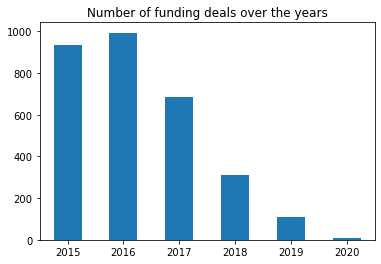

In [3]:
# lets begin by plotting using matplotlib and pandas
df.year.value_counts().sort_index(ascending=True).plot.bar(rot=0)
plt.title('Number of funding deals over the years')
plt.show()

## In this notebook we will try to use plotly as much as we can

In [4]:
num_of_funding_rounds = df.year.value_counts().sort_index(ascending=True)
num_of_funding_rounds

2015    936
2016    993
2017    687
2018    310
2019    111
2020      7
Name: year, dtype: int64

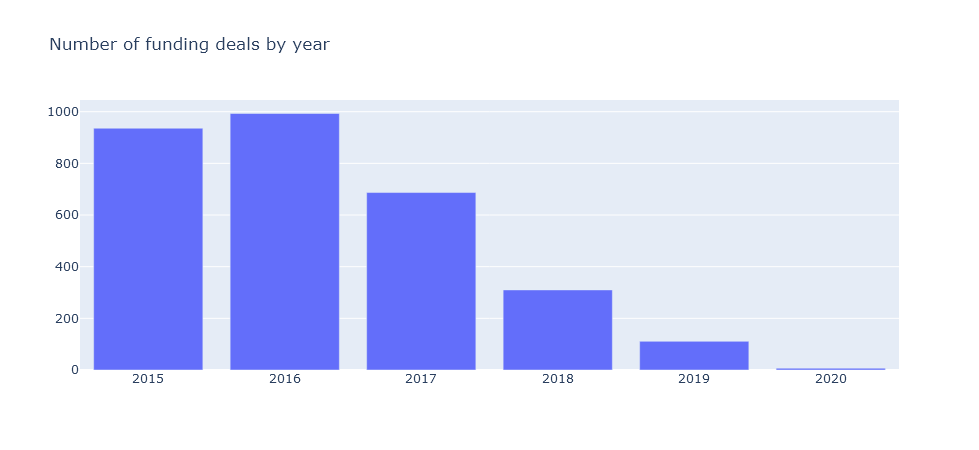

In [5]:
fig = go.Figure(data = go.Bar(x=num_of_funding_rounds.index,
                              y=num_of_funding_rounds.values),
                layout_title_text='Number of funding deals by year')
fig.show()

## Insight:


* Years 2015 & 2016 has got more number of fundings compared to the recent years

* We can see a clear decling trend in the number of funding deals from 2016. 

Not sure of the exact reason. One thing could be that not all the funding deals are captured in the recent days.



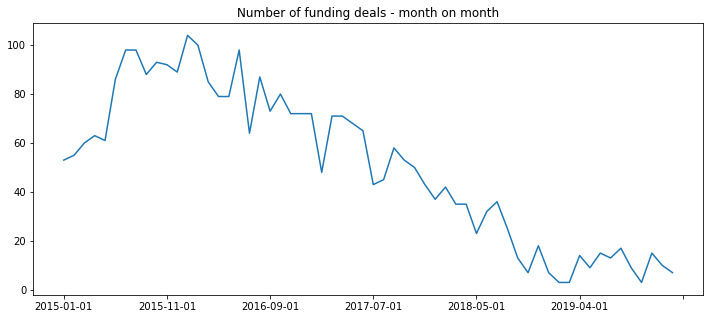

In [6]:
df.yearmonth.value_counts().sort_index().plot(figsize=(12,5))
plt.title('Number of funding deals - month on month')
plt.show()

## Insight:
We can see a steady decline here as well but seems to be increasing in the last few months.


## Lets try to see if the decrease in deals has any impact on amount being invested?

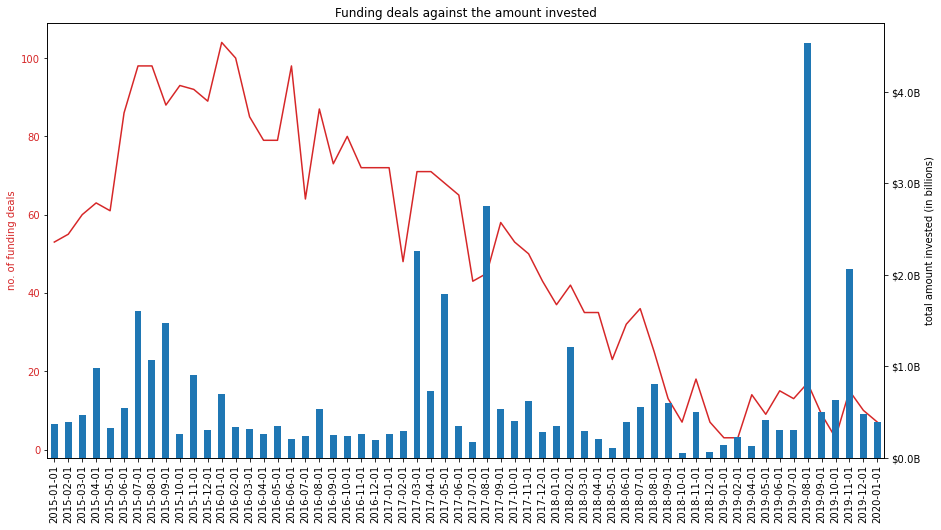

In [7]:
import matplotlib.ticker as ticker
ax1 = df.yearmonth.value_counts().sort_index().plot( figsize=(15,8), color='tab:red', rot=90)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylabel('no. of funding deals', color='tab:red')

#https://matplotlib.org/gallery/api/two_scales.html
ax2 = ax1.twinx()

# https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html
def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fB' % (x * 1e-9)
formatter_billions = ticker.FuncFormatter(billions)

#https://stackoverflow.com/a/38152510/8210613
formatter = ticker.StrMethodFormatter('${x:,.0f}')

ax2.yaxis.set_major_formatter(formatter_billions)

df.groupby('yearmonth').CleanedAmount.sum().plot.bar(ax=ax2)
ax2.set_ylabel('total amount invested (in billions)')
plt.title('Funding deals against the amount invested')
plt.show()

## Insight
Inspite of less number of deals, in the recent past, the total investments have seen exponential growth?? or is it??

## Task2: Funding Values


### Can we get an overview of the funding values investors usually invest?

In [8]:
# lets convert the amount from string to numeric
df['CleanedAmount'] = pd.to_numeric(df.AmountInUSD.str.replace(',',''),errors='coerce')

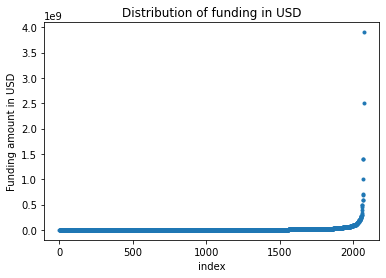

In [9]:
df.CleanedAmount.sort_values(ignore_index=True).plot(style='.')
plt.title('Distribution of funding in USD')
plt.xlabel('index')
plt.ylabel('Funding amount in USD')
plt.show()

## Insight:


There are some extreme values at the right. Let us see who are these very well funded startups.



In [10]:
df.iloc[df.CleanedAmount.nlargest(10).index]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,"3,90,00,00,000",NaN,2019,2019-08-01,3.900000e+09
651,652,11/08/2017,Flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,50,00,00,000",NaN,2017,2017-08-01,2.500000e+09
830,831,18/05/2017,Paytm,E-Commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,40,00,00,000",NaN,2017,2017-05-01,1.400000e+09
966,967,21/03/2017,Flipkart,E-Commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,40,00,00,000",NaN,2017,2017-03-01,1.400000e+09
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,NCR,Vijay Shekhar Sharma,Funding Round,"1,00,00,00,000",NaN,2019,2019-11-01,1.000000e+09
2648,2649,28/07/2015,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,"70,00,00,000","Late Stage, 10th Round More here",2015,2015-07-01,7.000000e+08
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,NCR,"Alibaba Group, Ant Financial",Private Equity,"68,00,00,000",Late Stage (Alibaba @ 40% equity),2015,2015-09-01,6.800000e+08
188,189,30/08/2018,True North,Finance,Private Equity Firm,Mumbai,NaN,Private Equity,"60,00,00,000",NaN,2018,2018-08-01,6.000000e+08
33,34,02/10/2019,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",Series D,"58,50,00,000",NaN,2019,2019-10-01,5.850000e+08
2244,2245,18/11/2015,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,"50,00,00,000",Series F ( More Details Here),2015,2015-11-01,5.000000e+08


## Insight:


* Rapido Bike Taxi looks like leading the pack by raising 3.9 Billion USD. But wait, this looks fishy. Infact Rapido raised 3.9 Billion INR and not USD. So this one is around 54 Million USD. This also shows that the data is not very accurate and so there should be caution in using it.
    
* Three of the next four high fundings are flipkart which seems to be expected and the other one is PayTM.
* Also Swiggy raised 1 Billion USD last year which is not in the data.

We will correct the data for Rapido and do the following analysis.


In [11]:
df.loc[60,'CleanedAmount']

3900000000.0

In [12]:
df.loc[60,'CleanedAmount'] = 50e6
df.loc[60,'CleanedAmount']

50000000.0

In [13]:
amt_df = df.groupby('year').CleanedAmount.agg(['sum','mean'])
amt_df

,sum,mean
year,,
2015,8.673022e+09,1.326150e+07
2016,3.828089e+09,6.532574e+06
2017,1.042931e+10,2.287129e+07
2018,5.122368e+09,1.932969e+07
2019,5.836577e+09,5.612093e+07
2020,3.902073e+08,5.574389e+07


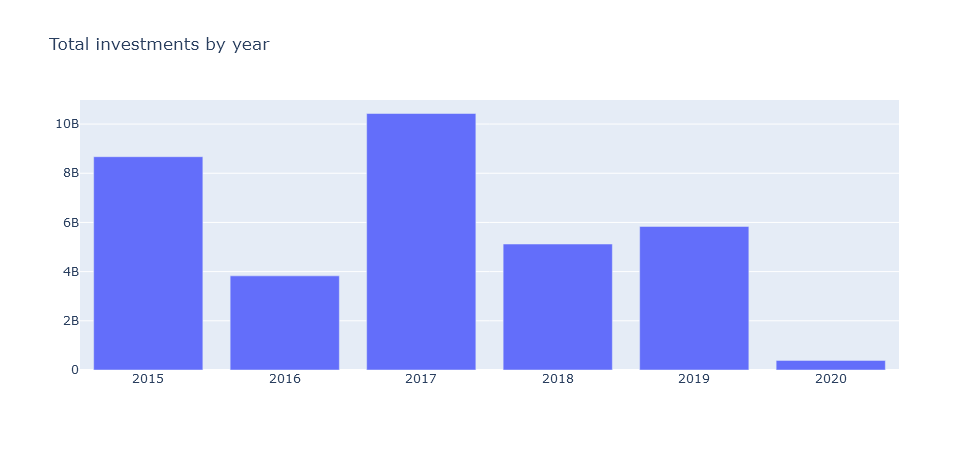

In [14]:
fig = go.Figure(data = go.Bar(x = amt_df.index,
                              y= amt_df['sum']),
                layout_title_text = 'Total investments by year')
fig.show()

## Insight:
* Though 2016 is the year with most number of funding deals, it is the year with the lowest sum (2020 is yet to complete)
* 2017 has got the highest total amount of funding in the last 5 years. Out of the 10B in 2017, 5.5B is raised by Flipkart and PayTM in 3 deals which we can see in the table above the plot.



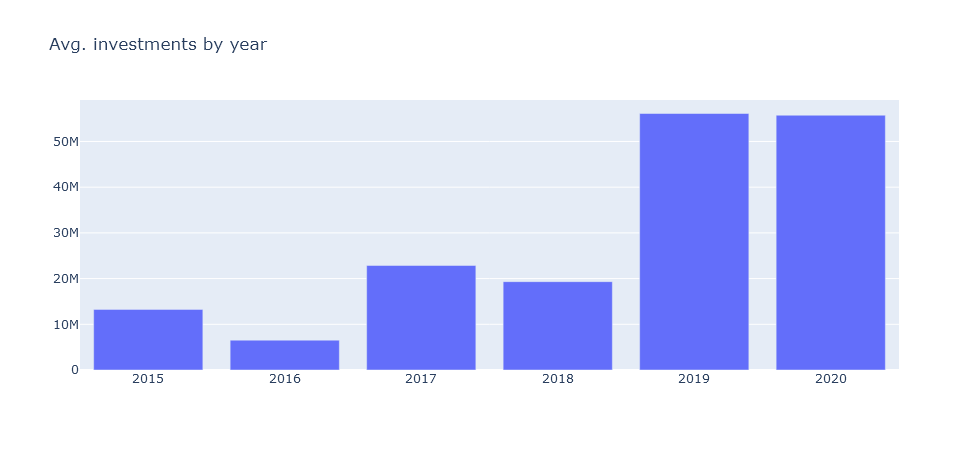

In [15]:
fig = go.Figure(data = go.Bar(x = amt_df.index,
                              y= amt_df['mean']),
                layout_title_text = 'Avg. investments by year')
fig.show()

## Insight:
* When it comes to the mean value of funding, 2020 leads the pack with an average of 55 Million USD.
* But the year has just started, should the mean funding of 2020 be considered or there is something we are missing? Check the number of funds raised in the year 2020, it is pretty less.
* We will consider 2019 data as valid data for mean funding.

## Task3: Investment Type

Now let us explore the investment type of the funding deals like whether it is seed funding, private equity funding or so on.


### Can we get an idea about the number and value of funding deals with respect to the investment type?

In [16]:
df.InvestmentType.nunique()

43

In [17]:
top10_inv_type = df.InvestmentType.value_counts()[:10]
top10_inv_type 


Seed Funding          1393
Private Equity        1357
Seed Angel Funding     141
Debt Funding            25
Series A                24
Series B                20
Series C                14
Series D                12
PreSeries A              8
Seed                     4
Name: InvestmentType, dtype: int64

https://stackoverflow.com/a/509295/8210613 [start :  stop  :  step ]

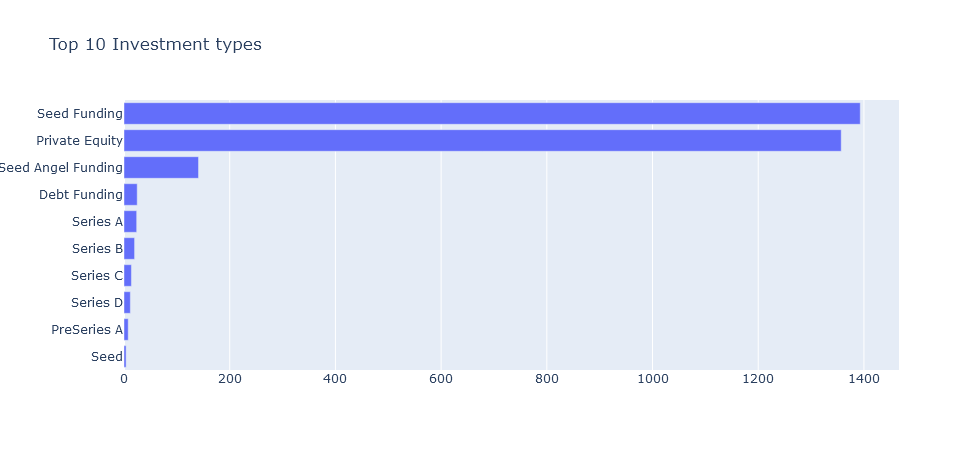

In [18]:
fig = go.Figure(data = go.Bar(y = top10_inv_type.index[::-1],
                              x= top10_inv_type.values[::-1],
                              orientation='h'),
                layout_title_text = 'Top 10 Investment types')
fig.show()

## Insight: 


* Seed funding tops the chart closely followed by Private Equity and seed angel funding
    
* We can clearly see the decreasing number of deals as we move up the stages of funding rounds like Series A, B, C & D



In [19]:
top10_inv_type_amt = df.groupby('InvestmentType').CleanedAmount.agg(['size','sum','mean']).sort_values('size',ascending=False)[:10]
top10_inv_type_amt

,size,sum,mean
InvestmentType,,,
Seed Funding,1393,7.757209e+08,1.038448e+06
Private Equity,1357,2.672787e+10,2.493271e+07
Seed Angel Funding,141,2.256960e+08,2.051782e+06
Debt Funding,25,1.509204e+08,6.288348e+06
Series A,24,2.032000e+08,9.236364e+06
Series B,20,9.491957e+08,4.745979e+07
Series C,14,1.044718e+09,7.462274e+07
Series D,12,1.481799e+09,1.234832e+08
PreSeries A,8,4.137200e+07,5.910286e+06


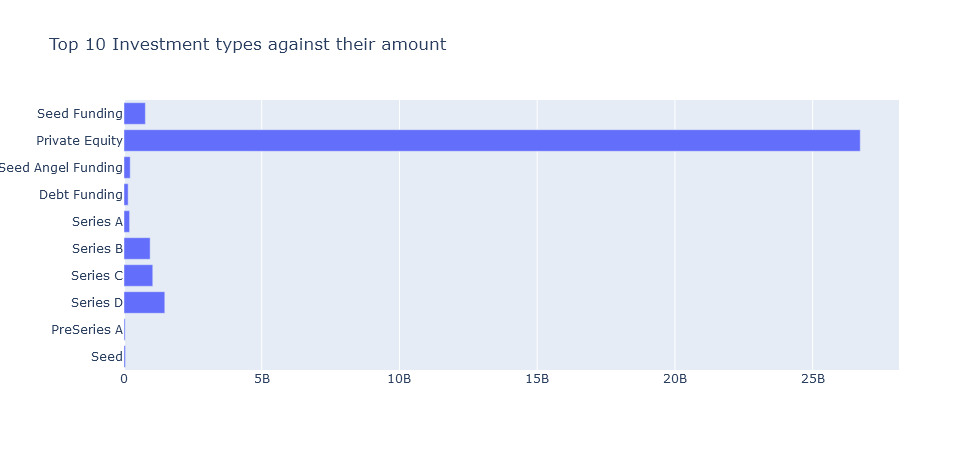

In [20]:
fig = go.Figure(data = go.Bar(y = top10_inv_type_amt.index[::-1],
                              x= top10_inv_type_amt['sum'][::-1],
                              orientation='h'),
                layout_title_text = 'Top 10 Investment types against their amount')
fig.show()

## Insight:


* Private equity funding seems to be the one with high number of deals and the highest sum value of 26.7B raised as well
* Though seed funding has 1388 funding deals, the sum of money raised is just about 500M since they happen during the very early stages of a startup.

Now let us see what is the average value raised by the startups in each of these funding rounds.

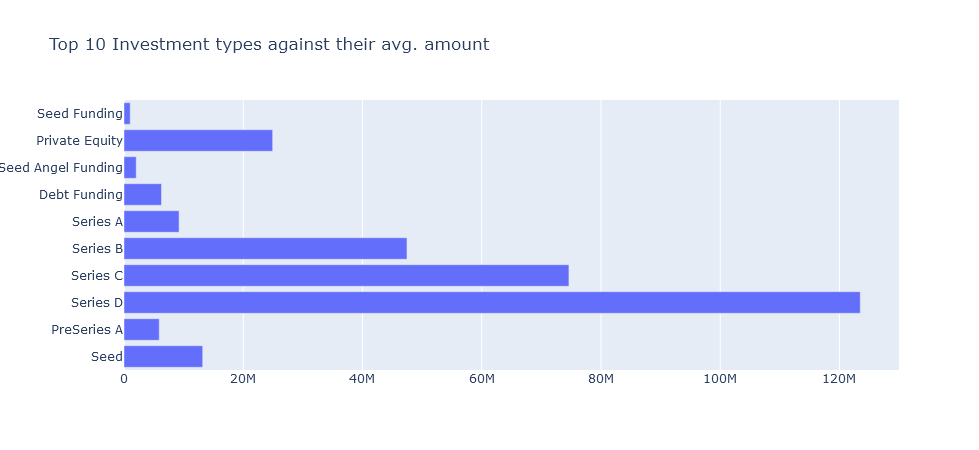

In [21]:
fig = go.Figure(data = go.Bar(y = top10_inv_type_amt.index[::-1],
                              x= top10_inv_type_amt['mean'][::-1],
                              orientation='h'),
                layout_title_text = 'Top 10 Investment types against their avg. amount')
fig.show()

## Insight:
We can see a clear increase in the mean funding value as we go up the funding round ladder from Seed funding to Series D as expected.

## Task4: Location

### Find about the major start up hubs in India.

Now let us explore the location of the startups that got funded. This can help us to understand the startup hubs of India.

Since there are multiple locations in the data, let us plot the top 10 locations. We will also club New Delhi, Gurgaon & Noida together to form NCR for the below chart.

In [22]:
df.City.nunique()

102

In [23]:
top10_cities = df.City.value_counts()[:10]
top10_cities

NCR          892
Bangalore    842
Mumbai       568
Pune         105
Hyderabad     99
Chennai       97
Ahmedabad     38
Jaipur        30
Kolkata       21
Indore        13
Name: City, dtype: int64

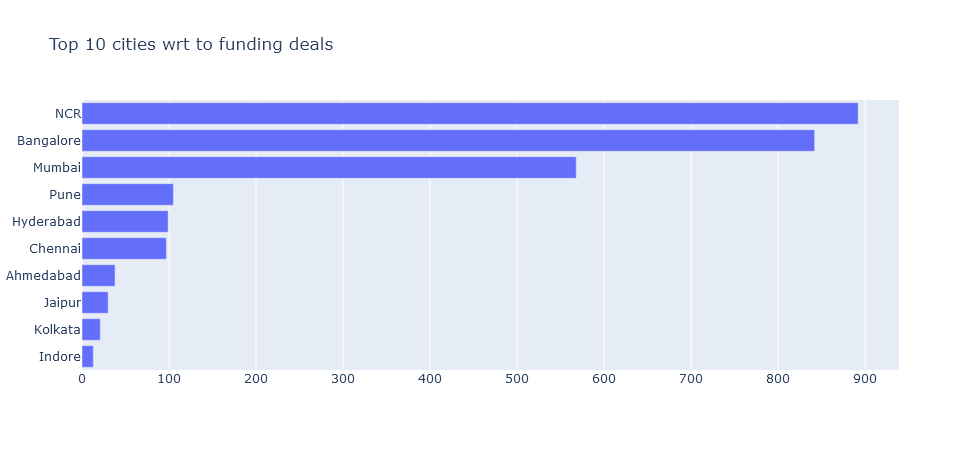

In [24]:
fig = go.Figure(data = go.Bar(y= top10_cities.index[::-1],
                              x= top10_cities.values[::-1],
                              orientation = 'h'),
               layout_title_text='Top 10 cities wrt to funding deals')
fig.show()

## Insight:


* NCR & Bangalore are almost equal to each other with respect to number of funding deals followed by Mumbai in third place.
    
* Chennai, Hyderabad & Pune are the next set of cities are that are catching up.



In [25]:
top10_cities_amt = df.groupby('City').CleanedAmount.agg(['size','sum','mean']).sort_values('size',ascending=False)[:10]
top10_cities_amt

,size,sum,mean
City,,,
NCR,892,8.461949e+09,1.492407e+07
Bangalore,842,1.462637e+10,2.508811e+07
Mumbai,568,4.940535e+09,1.228989e+07
Pune,105,6.330820e+08,8.916648e+06
Hyderabad,99,4.010762e+08,5.570503e+06
Chennai,97,7.187670e+08,9.583560e+06
Ahmedabad,38,1.136360e+08,4.208741e+06
Jaipur,30,1.527350e+08,1.090964e+07
Kolkata,21,1.598300e+07,1.598300e+06


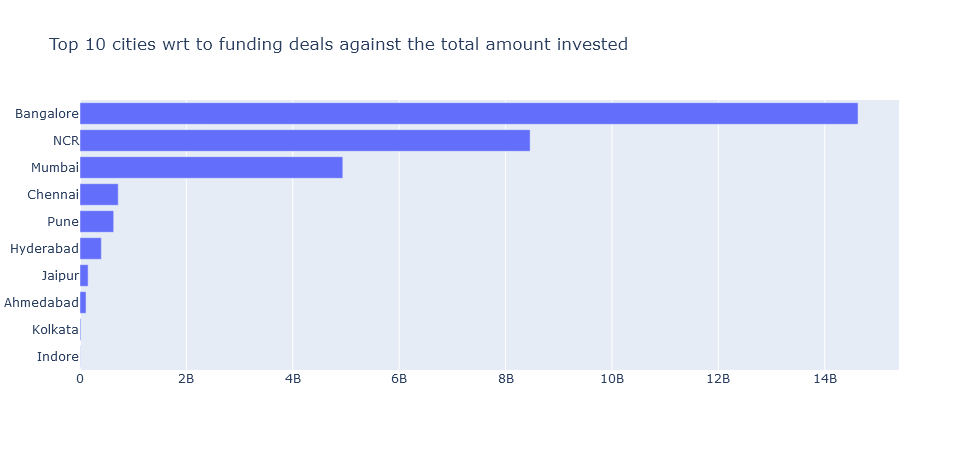

In [26]:
fig = go.Figure(data = go.Bar(y= top10_cities_amt.sort_values('sum',ascending=True).index,
                              x= top10_cities_amt.sort_values('sum',ascending=True)['sum'],
                              orientation = 'h'),
               layout_title_text='Top 10 cities wrt to funding deals against the total amount invested')
fig.show()

## Insight:
* Though NCR tops the number of funding deals when it comes to the total funding value by location, Bangalore leads the way by a huge margin.


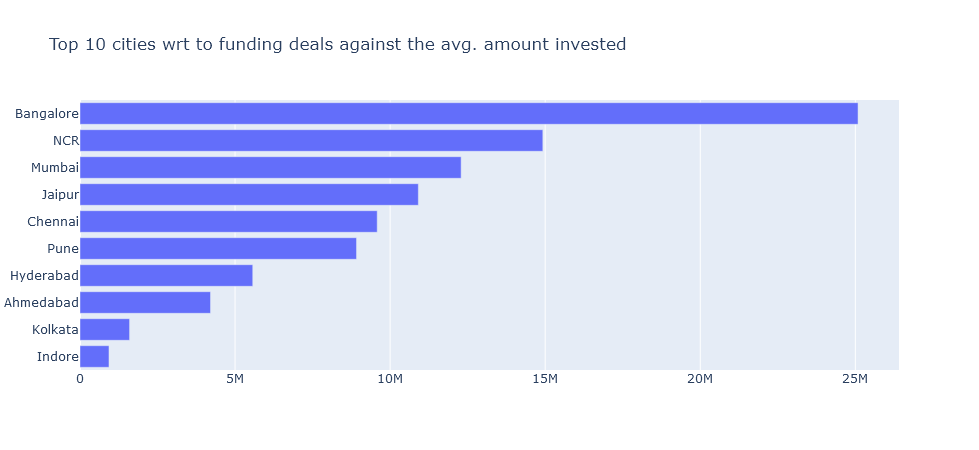

In [27]:
fig = go.Figure(data = go.Bar(y= top10_cities_amt.sort_values('mean',ascending=True).index,
                              x= top10_cities_amt.sort_values('mean',ascending=True)['mean'],
                              orientation = 'h'),
               layout_title_text='Top 10 cities wrt to funding deals against the avg. amount invested')
fig.show()

## Insight:

* Bangalore tops the list here again
* Jaipur took the fourth spot with respect to mean funding value



In [28]:
temp_df=(df.groupby(['City','year'])
 .CleanedAmount.agg(['size','mean'])
 .reset_index()
 .sort_values('size',ascending=False)
)
temp_df = temp_df.loc[temp_df.City.isin(["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad", "Jaipur"])]
temp_df.head()

,City,year,size,mean
112,NCR,2016,324,7.845871e+06
10,Bangalore,2016,283,6.202401e+06
111,NCR,2015,254,1.716481e+07
11,Bangalore,2017,226,4.606586e+07
9,Bangalore,2015,200,2.150281e+07


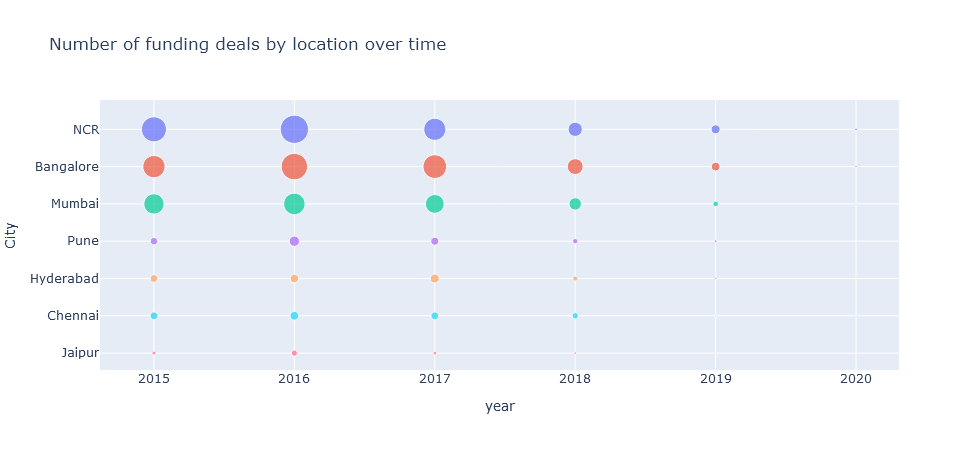

In [29]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='City', 
                 color='City', 
                 size='size',
                 title='Number of funding deals by location over time')
fig.update_layout(showlegend=False)
fig.show()

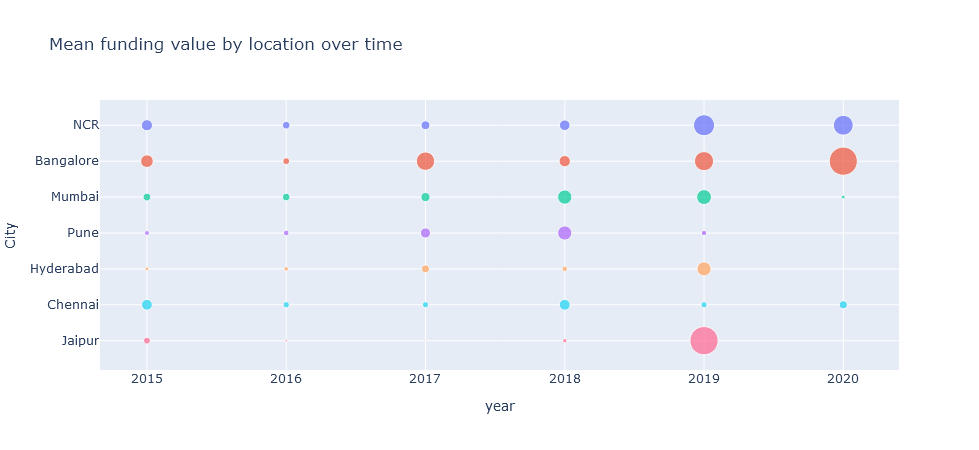

In [30]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='City', 
                 color='City', 
                 size='mean',
                 title='Mean funding value by location over time')
fig.update_layout(showlegend=False)
fig.show()

## Task6: Industry Vertical

Let us now have a look at the industry verticals and the number of funding deals for each vertical.


### Can we get an overview of the Industry verticals and the number of funding deals?

In [31]:
df.IndustryVertical.nunique()

819

In [32]:
top10_industries = df.IndustryVertical.value_counts()[:10]
top10_industries

Consumer Internet    941
Technology           478
E-Commerce           276
Healthcare            70
Finance               62
Logistics             32
Education             24
Food & Beverage       23
Ed-Tech               14
E-commerce            12
Name: IndustryVertical, dtype: int64

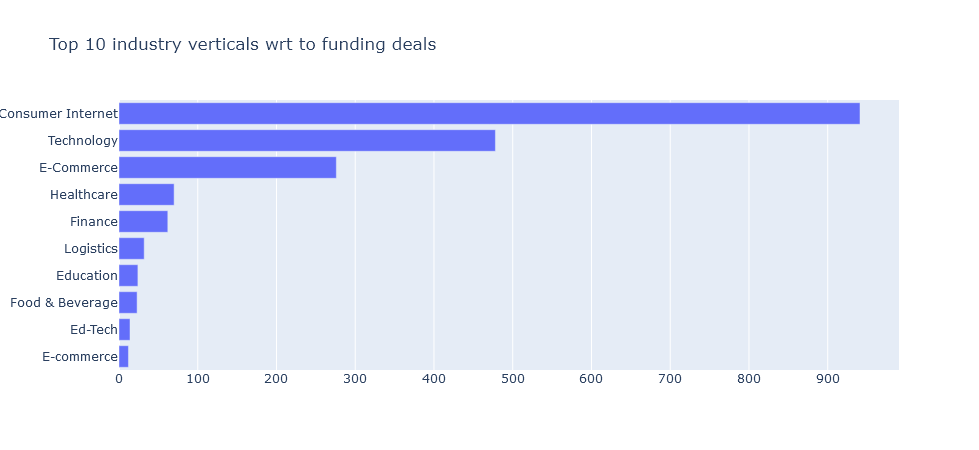

In [33]:
fig = go.Figure(data = go.Bar(y= top10_industries.index[::-1],
                              x= top10_industries.values[::-1],
                              orientation = 'h'),
               layout_title_text='Top 10 industry verticals wrt to funding deals')
fig.show()

## Insight:


Consumer Internet is the most preferred industry segment for funding followed by Technology and E-commerce.



In [34]:
temp_df=(df.groupby(['IndustryVertical','year'])
 .CleanedAmount.agg(['size','mean'])
 .reset_index()
 .sort_values('size',ascending=False)
)
temp_df = temp_df.loc[temp_df.IndustryVertical.isin(top10_industries.index)]
temp_df.head()

,IndustryVertical,year,size,mean
115,Consumer Internet,2016,539,6.291066e+06
116,Consumer Internet,2017,309,1.272341e+07
776,Technology,2017,223,7.064185e+06
775,Technology,2016,190,5.687608e+06
176,E-Commerce,2016,163,9.614323e+06


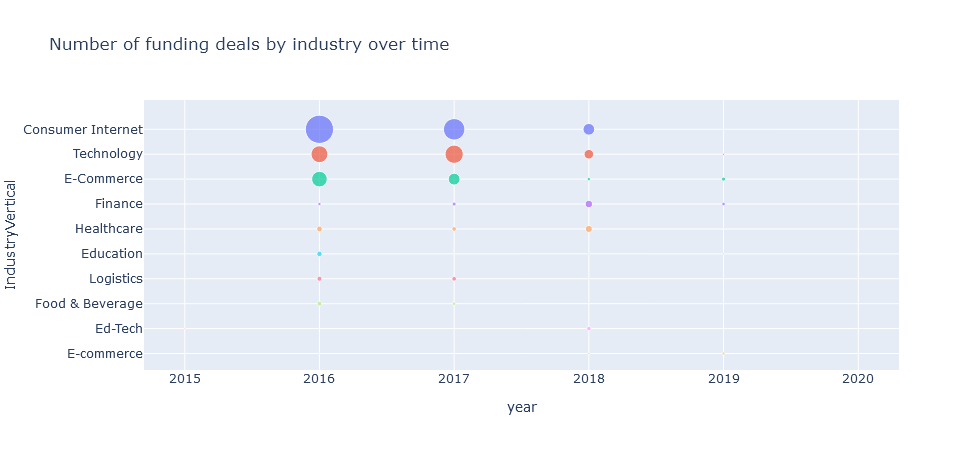

In [35]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='IndustryVertical', 
                 color='IndustryVertical', 
                 size='size',
                 title='Number of funding deals by industry over time')
fig.update_layout(showlegend=False)
fig.show()

## Insight:
Earlier Consumer Internet and Technology startups saw many deals, however in the recent past Finance and Healthcare are growing

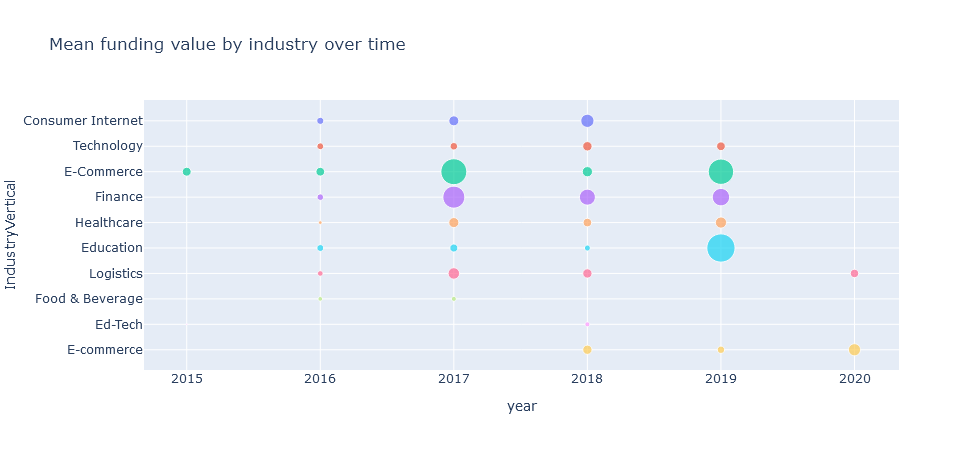

In [36]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='IndustryVertical', 
                 color='IndustryVertical', 
                 size='mean',
                 title='Mean funding value by industry over time')
fig.update_layout(showlegend=False)
fig.show()

## Insight:
E-commerce is by far the most popular investment industry, Education, Finance and Healthcare are picking up.

## Do it yourself

* Can we get information about the investors?
* Can we get information about the subvertical?